In [1]:
import pandas as pd

# Load the dataset
iris_df = pd.read_csv("C:\\Users\\tasweemb\\Documents\\Machine Learning Module\\Datasets\\Iris\\Unit06 iris.csv")

# Display the first few rows of the dataset
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# Extract the numeric columns for clustering
X = iris_df.drop('species', axis=1).values



In [3]:
from sklearn.metrics import silhouette_score

# Range of values for K
k_values = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Compute silhouette score for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

silhouette_scores

C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

[0.6808136202936816,
 0.5525919445499757,
 0.4978256901095472,
 0.4885175508886279,
 0.36820569682713084,
 0.3576975600180635,
 0.35912838676456094,
 0.3423796791000656,
 0.31659552132968305]

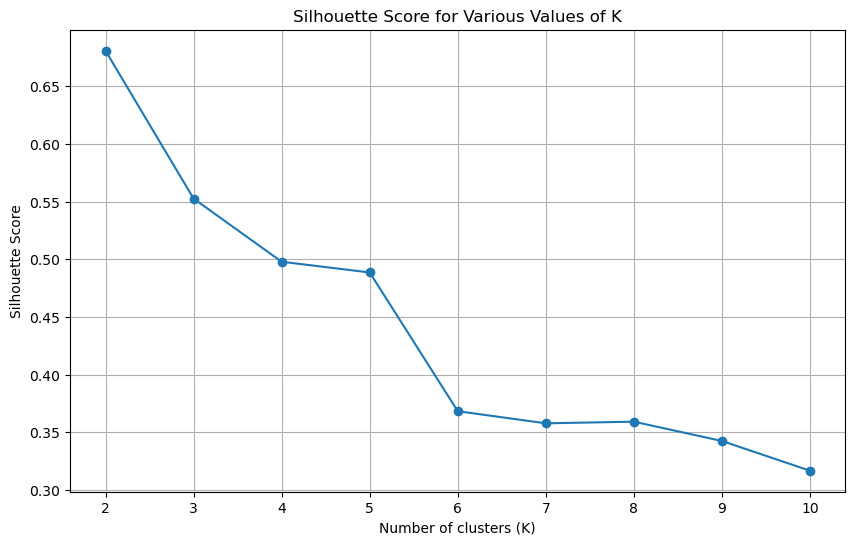

In [4]:
import matplotlib.pyplot as plt

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Values of K')
plt.grid(True)
plt.show()


In [5]:

# Perform K-Means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

clusters[:10]  # Display the first 10 cluster assignments

C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tasweemb\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# Create a cross-tabulation between clusters and actual species labels
cross_tab = pd.crosstab(iris_df['species'], clusters, rownames=['Actual Species'], colnames=['Predicted Clusters'])

cross_tab


Predicted Clusters,0,1,2
Actual Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36
